<a href="https://colab.research.google.com/github/andreacangiani/NMPDE2025/blob/main/python/C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finite Difference in 2D

1. Finite Difference solver for the 2D Poisson problem:

$-\Delta u=f \quad \in \Omega=(a,b)^2$

$u|_{\partial\Omega}=0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve

Function computing the 2D FD algebric system

In [2]:
omega = [0, 1]
N = 3

h = (omega[1]-omega[0])/N
x = np.linspace(omega[0],omega[1],N+1)
y = x
# 2-dim grid
X, Y = np.meshgrid(x,y)

X = X.flatten()
Y = Y.flatten()

print(X)

print(Y)

[0.         0.33333333 0.66666667 1.         0.         0.33333333
 0.66666667 1.         0.         0.33333333 0.66666667 1.
 0.         0.33333333 0.66666667 1.        ]
[0.         0.         0.         0.         0.33333333 0.33333333
 0.33333333 0.33333333 0.66666667 0.66666667 0.66666667 0.66666667
 1.         1.         1.         1.        ]


In [6]:
def FD2D(omega,N,rhs):
  # FD system matrix and rhs in omega^2 for
  # poisson equation homogeneous Dirichlet bc
  # uniform grid in sparse CSR format
  # with Nx = Ny = N

  # x and y axis grid
  h = (omega[1]-omega[0])/N
  x = np.linspace(omega[0],omega[1],N+1)
  y = x
  # 2-dim grid
  X, Y = np.meshgrid(x,y)
  X = X.flatten()
  Y = Y.flatten()

  # compute rhs
  F = rhs(X,Y)

  # compute system matrix
  # -(1/h^2) (U_{i,j-1}  +U_{i-1,j})     - 4 * U_{i,j}  +   U_{i+1,j} + U_{i,j+1} )
  coefs = [-1*np.ones((N+1)*(N)) ,-1*np.ones((N+1)*(N+1)-1),4*np.ones((N+1)*(N+1)),-1*np.ones((N+1)*(N+1)-1),-1*np.ones((N+1)*(N))]
  A = sp.diags(coefs, [-(N+1), -1, 0, 1, N+1],format="csr")

  # Implement boundary conditions
  for i in range(N+1):
    # y = a
    A[i,A[i].nonzero()] = 0; A[i,i] = 1; F[i] = 0
    # y = b
    j = (N+1) * N + i
    A[j,A[j].nonzero()] = 0; A[j,j] = 1; F[j] = 0

  for i in range(1,N):
    # x = a
    j = i * (N+1)
    A[j,A[j].nonzero()] = 0; A[j,j] = 1; F[j] = 0
    # x = b
    j = i * (N+1) + N
    A[j,A[j].nonzero()] = 0; A[j,j] = 1; F[j] = 0

  return (1./h**2) * A, F

Define FD problem and solve with $(a,b)=(0,
pi)$ and

$u(x,y)=sin(x)*sin(y)$

hence

$f=2* sin(x)*sin(y)$

In [7]:
# Problem data
omega = [0, np.pi]
N=50
rhs = lambda x, y : 2 * np.sin(x) * np.sin(y)
u = lambda x, y : np.sin(x) * np.sin(y)

# call function computing FD system
A, F = FD2D(omega,N,rhs)

# solve
uh = spsolve(A,F)


C:\Users\Giacomo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Plot solution

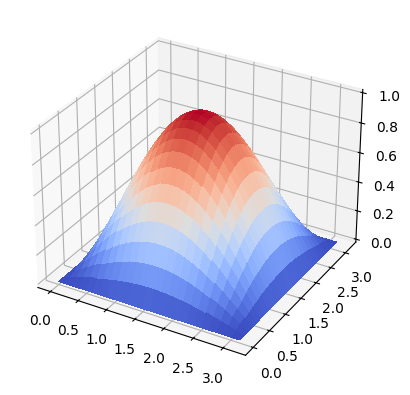

In [8]:
# Prepare data for plotting
x = np.linspace(omega[0],omega[1],N+1)
y = x
# 2-dim grid
X, Y = np.meshgrid(x,y)
Uh = uh.reshape((N+1),(N+1))

# Plot the solution
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Uh, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

Compute discrete max norm error

In [9]:
# compute exact sol
U = u(X,Y)

# Print discrete error
print(np.max(np.max(np.abs(U-Uh))))

0.0003290517629237488


**Exercise 1**: Run a series of experiments each time halfing the mesh size to each time computing the error and the EOC

[2.0337540817562987, 2.0083667395255342, 2.0020872428147354, 2.000521533702511, 2.000130365309319, 2.0000325730372714, 2.0000078406139368]
[2.042054034002471, 2.0104498275945955, 2.0026085172229626, 2.000651883896493, 2.000162960279091, 2.000040817024429]


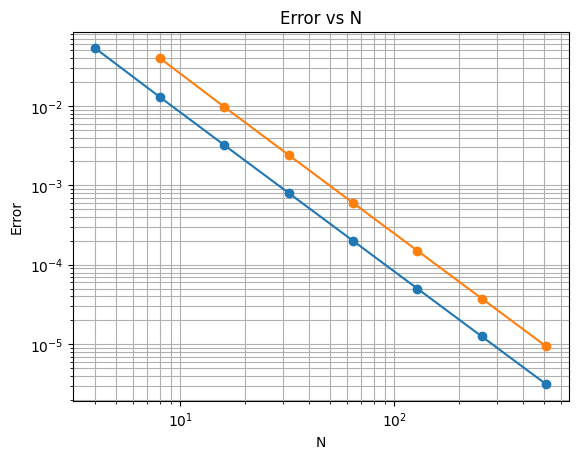

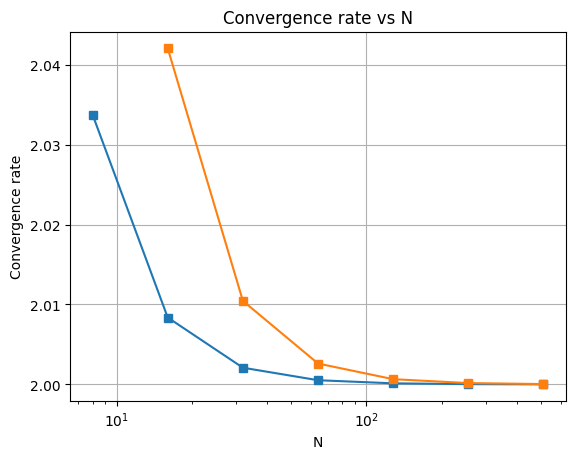

In [78]:
omega = [0, np.pi]
N = 4
rhs = lambda x, y : 2 * np.sin(x) * np.sin(y)
u = lambda x, y : np.sin(x) * np.sin(y)

no_exp = 10

Ns = []
error = []
rates = []
rel_error = []
rel_rates = []

for i in range(no_exp):
    # call function computing FD system
    A, F = FD2D(omega,N,rhs)

    # solve
    uh1 = spsolve(A,F)

    x = np.linspace(omega[0],omega[1],N+1)
    y = x
    # 2-dim grid
    X, Y = np.meshgrid(x,y)
    Uh = uh1.reshape((N+1),(N+1))
    # compute exact sol
    U = u(X,Y)

    # Print discrete error
    err = np.max(np.max(np.abs(U-Uh)))
    error.append(err)
    if (i>=1):
        rate=(np.log(error[i])-np.log(error[i-1]))/(np.log(1/N)-np.log(2/N))
        rates.append(float(rate))
        rel = np.max(np.abs(Uh[::2, ::2].ravel() - uh2))
        rel_error.append(rel)
    if (i>=2):
        rel_rate = (np.log(rel_error[i-1])-np.log(rel_error[i-2]))/(np.log(1/N)-np.log(2/N))
        rel_rates.append(float(rel_rate))

    Ns.append(N)
    N = N*2
    if N>=513:
        break
    uh2 = uh1

print(rates)
print(rel_rates)
plt.figure()
plt.loglog(Ns, error, marker='o')
plt.loglog(Ns[1:], rel_error, marker='o')
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Error vs N')
plt.grid(True, which='both')

plt.figure()
plt.plot(Ns[1:], rates, marker='s')
plt.plot(Ns[2:], rel_rates, marker='s')
plt.xlabel('N')
plt.ylabel('Convergence rate')
plt.title('Convergence rate vs N')
plt.grid(True)
plt.xscale('log')
plt.show()


**Exercise 2**: Generalise the FD2D routine to assemble more general elliptic problems. For instance, solve

-$\alpha \Delta u + {\bf b}\cdot \nabla u + c u =f\, $ in $\, \Omega$,

with homogeneous Dirichlet and nonhomogeneous Dirichlet boundary conditions.

Write a program to test your routine and check EOC.

In [ ]:
def FD2D(omega,N,rhs):
  # FD system matrix and rhs in omega^2 for
  # poisson equation homogeneous Dirichlet bc
  # uniform grid in sparse CSR format
  # with Nx = Ny = N

  # x and y axis grid
  h = (omega[1]-omega[0])/N
  x = np.linspace(omega[0],omega[1],N+1)
  y = x
  # 2-dim grid
  X, Y = np.meshgrid(x,y)
  X = X.flatten()
  Y = Y.flatten()

  # compute rhs
  F = rhs(X,Y)

  # compute system matrix
  # -(1/h^2) (U_{i,j-1}  +U_{i-1,j})     - 4 * U_{i,j}  +   U_{i+1,j} + U_{i,j+1} )
  coefs = [-1*np.ones((N+1)*(N)) ,-1*np.ones((N+1)*(N+1)-1),4*np.ones((N+1)*(N+1)),-1*np.ones((N+1)*(N+1)-1),-1*np.ones((N+1)*(N))]
  A = sp.diags(coefs, [-(N+1), -1, 0, 1, N+1],format="csr")

  # Implement boundary conditions
  for i in range(N+1):
    # y = a
    A[i,A[i].nonzero()] = 0; A[i,i] = 1; F[i] = 0
    # y = b
    j = (N+1) * N + i
    A[j,A[j].nonzero()] = 0; A[j,j] = 1; F[j] = 0

  for i in range(1,N):
    # x = a
    j = i * (N+1)
    A[j,A[j].nonzero()] = 0; A[j,j] = 1; F[j] = 0
    # x = b
    j = i * (N+1) + N
    A[j,A[j].nonzero()] = 0; A[j,j] = 1; F[j] = 0

  return (1./h**2) * A, F